## **Práctica 2: Reglas de asociación**

Nombre: Medina Segura Fernando

Email: fernando.med.seg@gmail.com

**Objetivo**

Analizar las transacciones y obtener reglas significativas (patrones) de los productos vendidos en un comercio minorista en Francia.
Los datos son transacciones de un comercio de un periodo de una semana (7 días).

**Características:**

* Ítems (20 productos)
* 7500 transacciones


Fuente de datos: store_data.csv

#### **1) Importar las bibliotecas necesarias**

In [1]:
!pip install apyori  # pip es un administrador de paquetes de Python. Se instala el paquete Apyori

In [1]:
import pandas as pd                 # Para la manipulación y análisis de los datos
import numpy as np                  # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt     # Para la generación de gráficas a partir de los datos
from apyori import apriori

#### **2) Importar los datos**

In [27]:
DatosTransacciones = pd.read_csv('Datos/groceries - groceries.csv')
DatosTransacciones

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9830,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observaciones:**

1) Se observa que el encabezado es la primera transacción.

2) NaN indica que esa película no fue rentada o comprada en esa transacción.

In [28]:
DatosTransacciones = pd.read_csv('Datos/groceries - groceries.csv', header=None)
DatosTransacciones.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **3) Procesamiento de los datos**

**Exploración**

Antes de ejecutar el algoritmo es recomendable observar la distribución de la frecuencia de los elementos.

In [29]:
#Se incluyen todas las transacciones en una sola lista
Transacciones = DatosTransacciones.values.reshape(-1).tolist() #-1 significa 'dimensión desconocida'

#Se crea una matriz (dataframe) usando la lista y se incluye una columna 'Frecuencia'
Lista = pd.DataFrame(Transacciones)
Lista['Frecuencia'] = 1

#Se agrupa los elementos
Lista = Lista.groupby(by=[0], as_index=False).count().sort_values(by=['Frecuencia'], ascending=True) #Conteo
Lista['Porcentaje'] = (Lista['Frecuencia'] / Lista['Frecuencia'].sum()) #Porcentaje
Lista = Lista.rename(columns={0 : 'Item'})

#Se muestra la lista
Lista

,Item,Frecuencia,Porcentaje
142,sound storage medium,1,0.000023
5,baby food,1,0.000023
115,preservation products,2,0.000046
80,kitchen utensil,4,0.000092
6,bags,4,0.000092
...,...,...,...
167,yogurt,1372,0.031637
139,soda,1715,0.039546
123,rolls/buns,1809,0.041714
103,other vegetables,1903,0.043881


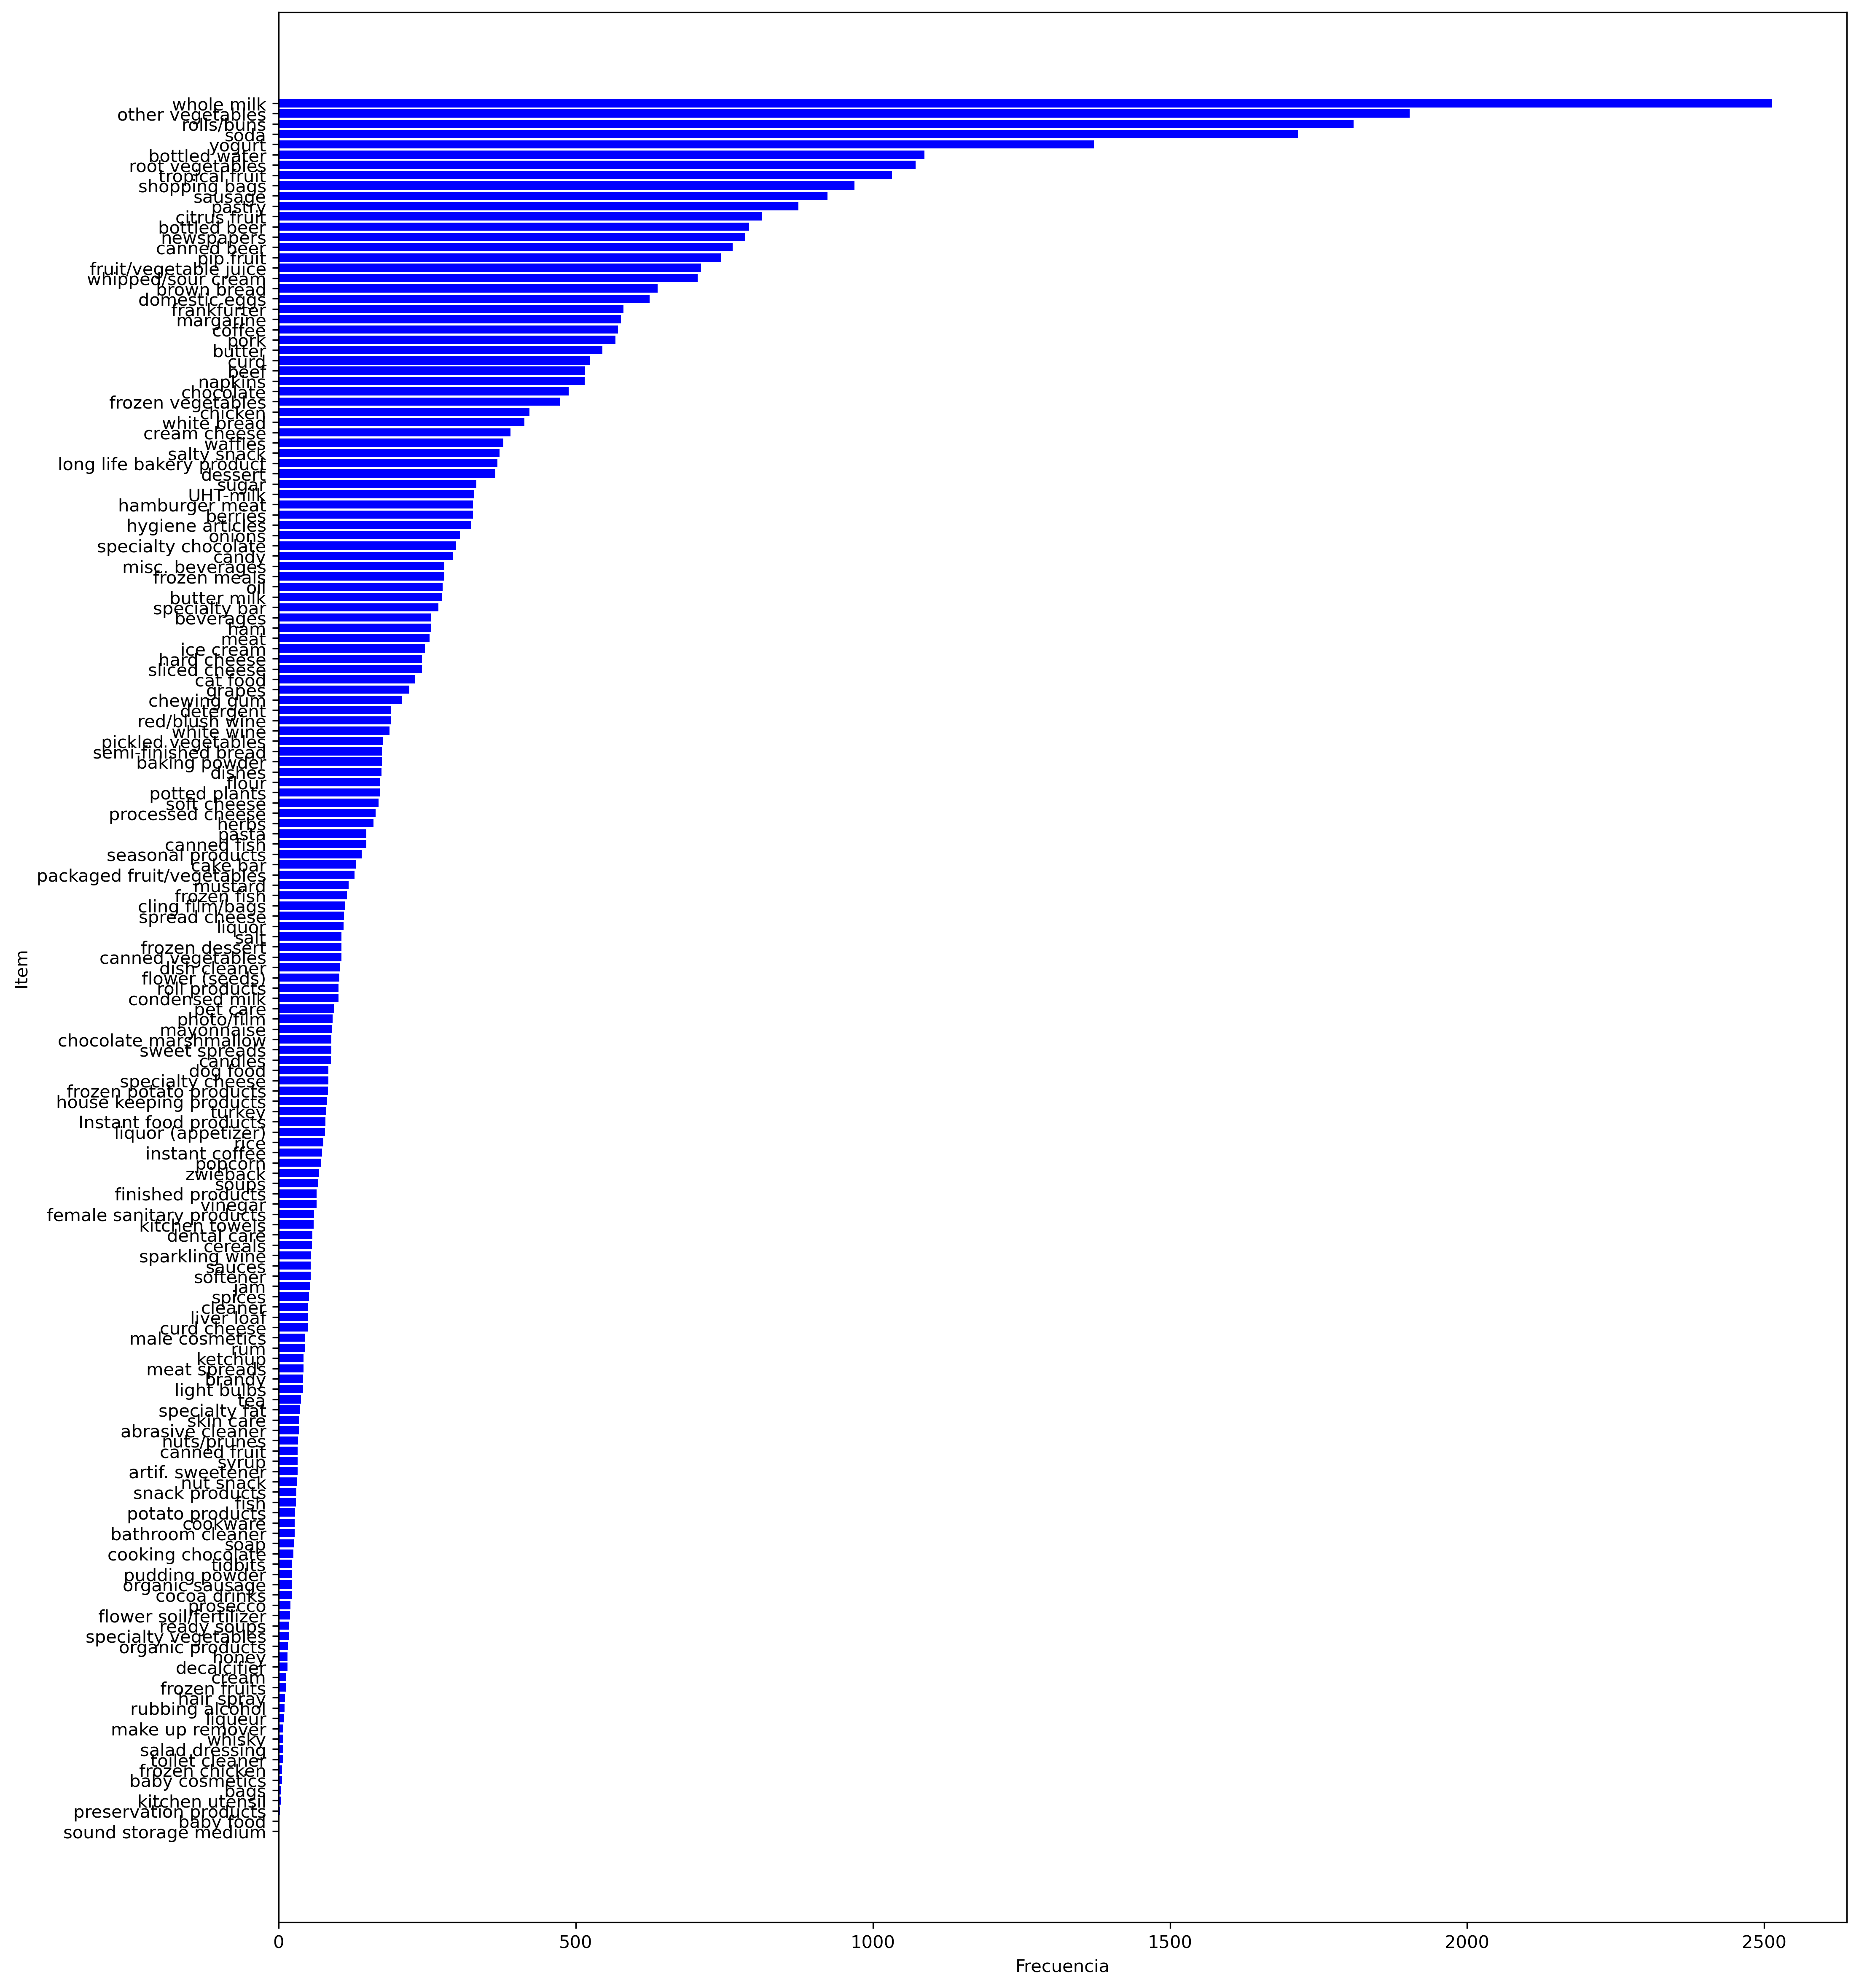

In [30]:
# Se genera un gráfico de barras
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item')
plt.xlabel('Frecuencia')
plt.barh(Lista['Item'], width=Lista['Frecuencia'], color='blue')
plt.show()

In [31]:
#Se crea una lista de listas a partir del dataframe y se remueven los 'NaN'
#level=0 especifica desde el primer índice
TransaccionesLista = DatosTransacciones.stack().groupby(level=0).apply(list).tolist()
TransaccionesLista 

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

#### **4) Aplicación del algoritmo**

**Configuración 1**

Obtener reglas para aquellos artículos que se compran al menos 5 veces al día, entonces, 5 x 7 = 35 veces en una semana, entonces:

i) El soporte mínimo se calcula de 35/7500 = 0.0045 (0.45%).

ii) La confianza mínima para las reglas de 20%

iii) La elevación de 3.

In [32]:
ReglasC1 = apriori(TransaccionesLista, 
                   min_support=0.0045, 
                   min_confidence=0.2, 
                   min_lift=3)

Se convierte las reglas encontradas por la clase apriori en una lista, puesto que es más fácil ver los resultados.

In [33]:
ResultadosC1 = list(ReglasC1)
print(len(ResultadosC1)) #Total de reglas encontradas 

64


In [34]:
ResultadosC1

[RelationRecord(items=frozenset({'baking powder', 'whipped/sour cream'}), support=0.004575495678698526, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.25862068965517243, lift=3.607850330154072)]),
 RelationRecord(items=frozenset({'root vegetables', 'beef'}), support=0.017386883579054397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'root vegetables'}), confidence=0.3313953488372093, lift=3.0403668431100312)]),
 RelationRecord(items=frozenset({'whipped/sour cream', 'berries'}), support=0.009049313675648195, ordered_statistics=[OrderedStatistic(items_base=frozenset({'berries'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.27217125382262997, lift=3.796885505454703)]),
 RelationRecord(items=frozenset({'bottled beer', 'liquor'}), support=0.004677173360447382, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liquor'}), items_add=frozen

Son 24 reglas. A manera de ejemplo se imprime la primera regla:

In [35]:
print(ResultadosC1[0])

RelationRecord(items=frozenset({'baking powder', 'whipped/sour cream'}), support=0.004575495678698526, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.25862068965517243, lift=3.607850330154072)])


La primera regla contiene dos elementos **chicken** y **light cream** que exclusivamente se compran juntos.

* Esto tiene sentido, las personas que compran crema ligera tienen cuidado con lo que comen, por lo que, es probable que compren pollo, en lugar de carne roja.

* El soporte es de 0.0045, la confianza de 0.2905, la elevación de 4.84, esto es, 4.84 veces más posibilidad de que compren crema ligera.

In [36]:
print(ResultadosC1[1])
print(ResultadosC1[2])

RelationRecord(items=frozenset({'root vegetables', 'beef'}), support=0.017386883579054397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'root vegetables'}), confidence=0.3313953488372093, lift=3.0403668431100312)])
RelationRecord(items=frozenset({'whipped/sour cream', 'berries'}), support=0.009049313675648195, ordered_statistics=[OrderedStatistic(items_base=frozenset({'berries'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.27217125382262997, lift=3.796885505454703)])


In [37]:
for item in ResultadosC1:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'baking powder', 'whipped/sour cream'})
Soporte: 0.004575495678698526
Confianza: 0.25862068965517243
Lift: 3.607850330154072
Regla: frozenset({'root vegetables', 'beef'})
Soporte: 0.017386883579054397
Confianza: 0.3313953488372093
Lift: 3.0403668431100312
Regla: frozenset({'whipped/sour cream', 'berries'})
Soporte: 0.009049313675648195
Confianza: 0.27217125382262997
Lift: 3.796885505454703
Regla: frozenset({'bottled beer', 'liquor'})
Soporte: 0.004677173360447382
Confianza: 0.4220183486238532
Lift: 5.240594013529793
Regla: frozenset({'red/blush wine', 'bottled beer'})
Soporte: 0.004880528723945094
Confianza: 0.253968253968254
Lift: 3.1537598204264876
Regla: frozenset({'sugar', 'flour'})
Soporte: 0.00498220640569395
Confianza: 0.28654970760233917
Lift: 8.46311223504206
Regla: frozenset({'root vegetables', 'herbs'})
Soporte: 0.007015760040671073
Confianza: 0.43124999999999997
Lift: 3.956477378731343
Regla: frozenset({'sliced cheese', 'sausage'})
Soporte: 0.0070157600406

**Configuración 2**

Obtener reglas para aquellos artículos que se compran al menos 30 veces al día, entonces, 30 x 7 = 210 veces en una semana, entonces:

i) El soporte mínimo se calcula de 210/7500 = 0.028 (2.8%).

ii) La confianza mínima para las reglas de 25%.

iii) La elevación mayor a 1.

In [38]:
ReglasC2 = apriori(TransaccionesLista, 
                   min_support=0.028, 
                   min_confidence=0.25, 
                   min_lift = 1.01)

In [39]:
ResultadosC2 = list(ReglasC2)
print(len(ResultadosC2))

20


In [40]:
ResultadosC2 

[RelationRecord(items=frozenset({'bottled water', 'soda'}), support=0.028978139298423997, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled water'}), items_add=frozenset({'soda'}), confidence=0.2621895124195032, lift=1.5035765916302124)]),
 RelationRecord(items=frozenset({'bottled water', 'whole milk'}), support=0.03436705643111337, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled water'}), items_add=frozenset({'whole milk'}), confidence=0.31094756209751606, lift=1.2169396232507244)]),
 RelationRecord(items=frozenset({'citrus fruit', 'other vegetables'}), support=0.02887646161667514, ordered_statistics=[OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozenset({'other vegetables'}), confidence=0.34889434889434895, lift=1.8031402634660652)]),
 RelationRecord(items=frozenset({'citrus fruit', 'whole milk'}), support=0.030503304524656837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozenset(

In [41]:
print(ResultadosC2[0])

RelationRecord(items=frozenset({'bottled water', 'soda'}), support=0.028978139298423997, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled water'}), items_add=frozenset({'soda'}), confidence=0.2621895124195032, lift=1.5035765916302124)])


La primera regla contiene dos elementos: **hamburguesas** y **huevos** que comúnmente se compran juntos.

* Tiene sentido, algunas personas que compran hamburguesas consumen también huevos, como comida de preparación rápida.

* El soporte es de 0.028 (2.8%), la confianza de 0.33 (33%), la elevación de 1.83, esto es, hay casi 2 veces más probabilidades de que cuando se compre posibilidades se compre también huevos.

In [42]:
print(ResultadosC2[1])
print(ResultadosC2[2])

RelationRecord(items=frozenset({'bottled water', 'whole milk'}), support=0.03436705643111337, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bottled water'}), items_add=frozenset({'whole milk'}), confidence=0.31094756209751606, lift=1.2169396232507244)])
RelationRecord(items=frozenset({'citrus fruit', 'other vegetables'}), support=0.02887646161667514, ordered_statistics=[OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozenset({'other vegetables'}), confidence=0.34889434889434895, lift=1.8031402634660652)])


In [43]:
for item in ResultadosC2:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'bottled water', 'soda'})
Soporte: 0.028978139298423997
Confianza: 0.2621895124195032
Lift: 1.5035765916302124
Regla: frozenset({'bottled water', 'whole milk'})
Soporte: 0.03436705643111337
Confianza: 0.31094756209751606
Lift: 1.2169396232507244
Regla: frozenset({'citrus fruit', 'other vegetables'})
Soporte: 0.02887646161667514
Confianza: 0.34889434889434895
Lift: 1.8031402634660652
Regla: frozenset({'citrus fruit', 'whole milk'})
Soporte: 0.030503304524656837
Confianza: 0.36855036855036855
Lift: 1.4423767905662055
Regla: frozenset({'domestic eggs', 'whole milk'})
Soporte: 0.029994916115912557
Confianza: 0.47275641025641024
Lift: 1.8502026640954214
Regla: frozenset({'root vegetables', 'other vegetables'})
Soporte: 0.047381799694966954
Confianza: 0.43470149253731344
Lift: 2.2466049285887952
Regla: frozenset({'other vegetables', 'tropical fruit'})
Soporte: 0.035892221657346214
Confianza: 0.34205426356589147
Lift: 1.7677896385551983
Regla: frozenset({'whipped/sour cream'